In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mean
import sklearn
from sklearn.utils import resample
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pylab import rc, plot
import itertools  
from sklearn.utils import shuffle

In [3]:
df = pd.read_csv('Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info('Churn.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
table = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [6]:
table.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10


In [7]:
fd = df['Tenure'].mean()
table = table.fillna(fd)

In [8]:
features = pd.get_dummies(table)
target = df['Exited']

In [9]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.33, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.45, random_state=12345)
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6700, 13) (1815, 13) (1485, 13)
(6700,) (1815,) (1485,)


In [10]:
pd.options.mode.chained_assignment = None
scaler=StandardScaler()
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

0    7963
1    2037
Name: Exited, dtype: int64

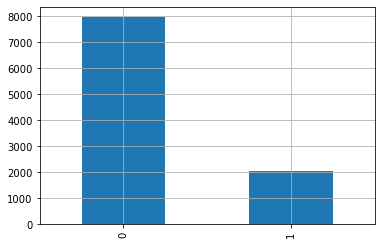

In [11]:
df['Exited'].value_counts().plot(kind='bar', grid=True,figsize=(6,4))
df['Exited'].value_counts()

In [12]:
clf = DecisionTreeClassifier(random_state=1000, max_depth=5)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_valid)
#print(clf.tree_.max_depth)

In [13]:
clf.score(features_valid, target_valid)

0.8473829201101928

In [14]:
print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.8473829201101928 0.7511111111111111 0.43333333333333335 0.5495934959349593


In [15]:
proba_valid = clf.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, proba_valid)

0.8323283850652272

In [16]:
clf_2 = RandomForestClassifier(n_estimators=65,
                               random_state = 12345,
                               max_depth=20)
clf_2 = clf_2.fit(features_train, target_train)
pred = clf_2.predict(features_valid)

In [17]:
print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.8534435261707989 0.7540983606557377 0.4717948717948718 0.5804416403785488


In [18]:
proba_valid = clf_2.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, proba_valid)

0.83982995951417

In [19]:
clf_3 = LogisticRegression(random_state=12345)
clf_3 = clf_3.fit(features_train, target_train)
pred = clf_3.predict(features_valid)

In [20]:
print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.7928374655647383 0.5486111111111112 0.20256410256410257 0.29588014981273414


In [21]:
proba_valid = clf_2.predict_proba(features_valid)[:, 1]
roc_auc_score(target_valid, proba_valid)

0.83982995951417

Confusion matrix, without normalization
[[521 215]
 [164 377]]


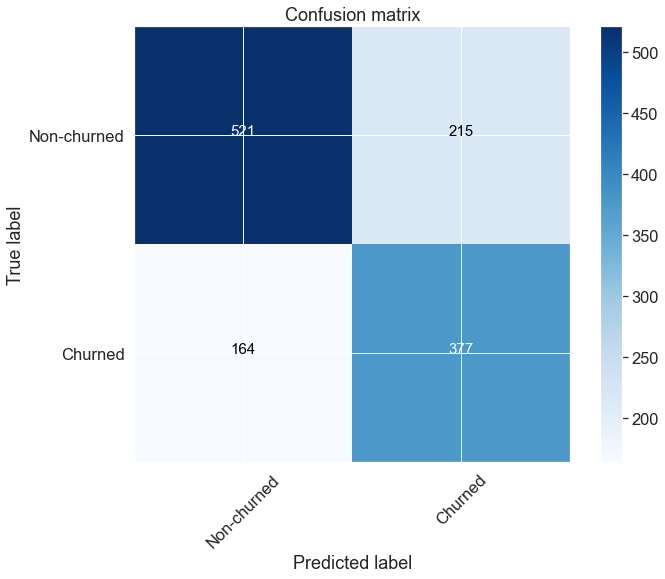

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = sklearn.metrics.confusion_matrix(target_valid, clf_2.predict(features_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [23]:
report = classification_report(target_valid, clf_2.predict(features_valid), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.87      0.96      0.91      1425
     Churned       0.75      0.47      0.58       390

    accuracy                           0.85      1815
   macro avg       0.81      0.71      0.75      1815
weighted avg       0.84      0.85      0.84      1815



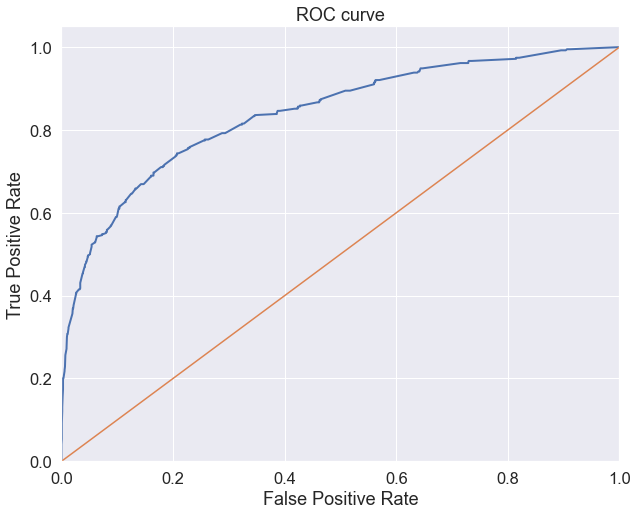

In [24]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(target_valid, clf_2.predict_proba(features_valid)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [25]:
prediction = pd.Series([0 for i in target_valid])
accuracy_score(target_valid, prediction)

0.7851239669421488

In [26]:
np.mean(target_train)

0.2008955223880597

In [27]:
received_f1 = 0
received_d = 0
for d in range(1, 20): 
    clf = DecisionTreeClassifier(random_state=12345, max_depth=d, class_weight='balanced')
    clf.fit(features_train,target_train)
    pred = clf.predict(features_valid)
    f1 = f1_score(target_valid, pred)
    if f1>received_f1:
            received_f1=f1
            received_d=d
print('Optimal depth', received_d,'Optimal F1', received_f1)

Optimal depth 5 Optimal F1 0.598639455782313


In [28]:
clf = DecisionTreeClassifier(random_state=1000, max_depth=received_d, class_weight='balanced')
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_valid)

In [29]:
print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.8049586776859504 0.5365853658536586 0.676923076923077 0.598639455782313


In [30]:
received_f1 = 0
received_d = 0
received_est = 0
for est in range (90, 95):
    for d in range(1, 25):
        clf_2 = RandomForestClassifier(n_estimators=est, max_depth=d, random_state=12345, class_weight='balanced')
        clf_2.fit(features_train, target_train)
        pred= clf_2.predict(features_valid)
        f1 = f1_score(target_valid, pred)
        if f1>received_f1:
            received_f1=f1
            received_est=est
            received_d=d      
print('Optimal depth', received_d,'n_estimators =', received_est, 'Optimal F1', received_f1)

Optimal depth 6 n_estimators = 94 Optimal F1 0.6146993318485523


In [31]:
clf_2 = RandomForestClassifier(n_estimators=received_est,
                               random_state = 12345,
                               max_depth=received_d,
                              class_weight='balanced')
clf_2 = clf_2.fit(features_train, target_train)
pred = clf_2.predict(features_valid)

In [32]:
print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.809366391184573 0.5433070866141733 0.7076923076923077 0.6146993318485523


In [33]:
clf_3 = LogisticRegression(class_weight='balanced')
clf_3 = clf_3.fit(features_train, target_train)
pred = clf_3.predict(features_valid)

In [34]:
print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.6964187327823691 0.3838383838383838 0.6820512820512821 0.4912280701754385


In [35]:
mult = len(df.loc[df['Exited']==0])//len(df.loc[df['Exited']==1])
mult

3

In [80]:
df_1 = df.loc[df['Exited']==1]
df_1 = df_1.loc[df_1.index.repeat(mult)]
train_n = pd.concat([df.loc[df['Exited']==0], df_1]).sample(frac=1)

In [81]:
train_n['Exited'].value_counts()

0    7963
1    6111
Name: Exited, dtype: int64

In [82]:
table = train_n.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [83]:
fd = df['Tenure'].mean()
table = table.fillna(fd)
features = pd.get_dummies(table)
target = train_n['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.3)

In [84]:
pd.options.mode.chained_assignment = None
scaler=StandardScaler()
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

In [41]:
received_f1 = 0
received_d = 0
for d in range(1, 20): 
    clf = DecisionTreeClassifier(random_state=12345, max_depth=d, class_weight='balanced')
    clf.fit(features_train,target_train)
    pred = clf.predict(features_valid)
    f1 = f1_score(target_valid, pred)
    if f1>received_f1:
            received_f1=f1
            received_d=d
print('Optimal depth', received_d,'Optimal F1', received_f1)

clf = DecisionTreeClassifier(random_state=1000, max_depth=received_d, class_weight='balanced')
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_valid)

print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

Optimal depth 19 Optimal F1 0.8724216959511076
0.8811271607861709 0.8080188679245283 0.9474557522123894 0.8721995926680244


In [85]:
received_f1 = 0
received_d = 0
received_est = 0
for est in range (90, 95):
    for d in range(1, 25):
        clf_2 = RandomForestClassifier(n_estimators=est, max_depth=d, random_state=12345, class_weight='balanced')
        clf_2.fit(features_train, target_train)
        pred= clf_2.predict(features_valid)
        f1 = f1_score(target_valid, pred)
        if f1>received_f1:
            received_f1=f1
            received_est=est
            received_d=d      
print('Optimal depth', received_d,'n_estimators =', received_est, 'Optimal F1', received_f1)


clf_2 = RandomForestClassifier(n_estimators=received_est,
                               random_state = 12345,
                               max_depth=received_d,
                              class_weight='balanced')
clf_2 = clf_2.fit(features_train, target_train)
pred = clf_2.predict(features_valid)


print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

Optimal depth 21 n_estimators = 90 Optimal F1 0.9373706004140786
0.9426947667534927 0.9045954045954046 0.972610096670247 0.9373706004140786


In [43]:
clf_3 = LogisticRegression(class_weight='balanced')
clf_3 = clf_3.fit(features_train, target_train)
pred = clf_3.predict(features_valid)


print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.7068434762017524 0.6466049382716049 0.6952433628318584 0.670042643923241


In [44]:
no_ex = df[df["Exited"] == 0]
ex = df[df["Exited"] == 1]

In [45]:
no_ex_downsample = resample(no_ex,
             replace=True,
             n_samples=len(ex),
             random_state=42)

print(no_ex_downsample.shape)

(2037, 14)


In [46]:
data_downsampled = pd.concat([no_ex_downsample, ex])

In [47]:
data_downsampled['Exited'].value_counts()

0    2037
1    2037
Name: Exited, dtype: int64

In [72]:
table = data_downsampled.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)


In [73]:
fd = df['Tenure'].mean()
table = table.fillna(fd)
features = pd.get_dummies(table)
target = data_downsampled['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.3)

In [74]:
pd.options.mode.chained_assignment = None
scaler=StandardScaler()
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])

In [51]:
received_f1 = 0
received_d = 0
for d in range(1, 20): 
    clf = DecisionTreeClassifier(random_state=12345, max_depth=d, class_weight='balanced')
    clf.fit(features_train,target_train)
    pred = clf.predict(features_valid)
    f1 = f1_score(target_valid, pred)
    if f1>received_f1:
            received_f1=f1
            received_d=d
print('Optimal depth', received_d,'Optimal F1', received_f1)

clf = DecisionTreeClassifier(random_state=1000, max_depth=received_d, class_weight='balanced')
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_valid)

print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

Optimal depth 6 Optimal F1 0.7709677419354839
0.7669664758789861 0.7794117647058824 0.7607655502392344 0.7699757869249395


In [52]:
received_f1 = 0
received_d = 0
received_est = 0
for est in range (90, 95):
    for d in range(1, 25):
        clf_2 = RandomForestClassifier(n_estimators=est, max_depth=d, random_state=12345, class_weight='balanced')
        clf_2.fit(features_train, target_train)
        pred= clf_2.predict(features_valid)
        f1 = f1_score(target_valid, pred)
        if f1>received_f1:
            received_f1=f1
            received_est=est
            received_d=d      
print('Optimal depth', received_d,'n_estimators =', received_est, 'Optimal F1', received_f1)


clf_2 = RandomForestClassifier(n_estimators=received_est,
                               random_state = 12345,
                               max_depth=received_d,
                              class_weight='balanced')
clf_2 = clf_2.fit(features_train, target_train)
pred = clf_2.predict(features_valid)


print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

Optimal depth 18 n_estimators = 91 Optimal F1 0.773978315262719
0.7784137367130008 0.8111888111888111 0.7400318979266348 0.773978315262719


In [53]:
clf_3 = LogisticRegression(class_weight='balanced')
clf_3 = clf_3.fit(features_train, target_train)
pred = clf_3.predict(features_valid)


print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.6941946034341783 0.7104825291181365 0.6810207336523126 0.6954397394136809


In [106]:
final = RandomForestClassifier(n_estimators=90,
                               random_state = 12345,
                               max_depth=21,
                                )
final = final.fit(features_train, target_train)
pred = final.predict(features_valid)


print(accuracy_score(target_valid, pred),
precision_score(target_valid, pred),
recall_score(target_valid, pred),
f1_score(target_valid, pred))

0.9451840250587314 0.9039451114922813 0.9741219963031423 0.9377224199288255


In [102]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.45, random_state=12345)

In [103]:
pred = final.predict(features_test)
print(accuracy_score(target_test, pred),
precision_score(target_test, pred),
recall_score(target_test, pred),
f1_score(target_test, pred))

0.9464114832535885 0.9211538461538461 0.9696356275303644 0.9447731755424064


In [98]:
pred_const = pd.Series([0]*len(target_valid))
pred_const.value_counts()

0    2322
dtype: int64

In [101]:
print('accuracy_score const', accuracy_score(target_valid, pred_const))
print('accuracy_score final', accuracy_score(target_valid, pred))

accuracy_score const 0.5542635658914729
accuracy_score final 0.9444444444444444


In [104]:
report = classification_report(target_test, final.predict(features_test), target_names=['Non-churned', 'Churned'])
print(report)

              precision    recall  f1-score   support

 Non-churned       0.97      0.93      0.95       551
     Churned       0.92      0.97      0.94       494

    accuracy                           0.95      1045
   macro avg       0.95      0.95      0.95      1045
weighted avg       0.95      0.95      0.95      1045

